In [1]:
# importing libraries
import pandas as pd
import numpy as np
import datetime 
import statsmodels as sm
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.preprocessing import MinMaxScaler 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

## Stock Price Data Pre-Processing

In [2]:
df = pd.read_csv('SandP500_1.csv')

In [3]:
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-03-12,3924.520020,3944.989990,3915.209961,3943.340088,3943.340088,4476280000
1,2021-03-15,3942.959961,3970.080078,3923.540039,3968.939941,3968.939941,4900100000
2,2021-03-16,3973.590088,3981.040039,3953.439941,3962.709961,3962.709961,4613080000
3,2021-03-17,3949.570068,3983.870117,3935.739990,3974.120117,3974.120117,4561660000
4,2021-03-18,3953.500000,3969.620117,3910.860107,3915.459961,3915.459961,5118590000
5,2021-03-19,3913.139893,3930.120117,3886.750000,3913.100098,3913.100098,7757420000
6,2021-03-22,3916.479980,3955.310059,3914.159912,3940.590088,3940.590088,4316260000
7,2021-03-23,3937.600098,3949.129883,3901.570068,3910.520020,3910.520020,4669010000
8,2021-03-24,3919.929932,3942.080078,3889.070068,3889.139893,3889.139893,4783020000
9,2021-03-25,3879.340088,3919.540039,3853.500000,3909.520020,3909.520020,4948340000


In [4]:
# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

## Data Cleaning

In [5]:
# Data Cleaning
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [6]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-03-12,3924.520020,3944.989990,3915.209961,3943.340088,3943.340088,4476280000
1,2021-03-15,3942.959961,3970.080078,3923.540039,3968.939941,3968.939941,4900100000
2,2021-03-16,3973.590088,3981.040039,3953.439941,3962.709961,3962.709961,4613080000
3,2021-03-17,3949.570068,3983.870117,3935.739990,3974.120117,3974.120117,4561660000
4,2021-03-18,3953.500000,3969.620117,3910.860107,3915.459961,3915.459961,5118590000
...,...,...,...,...,...,...,...
660,2023-10-25,4232.419922,4232.419922,4181.419922,4186.770020,4186.770020,3869370000
661,2023-10-26,4175.990234,4183.600098,4127.899902,4137.229980,4137.229980,4277640000
662,2023-10-27,4152.930176,4156.700195,4103.779785,4117.370117,4117.370117,4019500000
663,2023-10-30,4139.390137,4177.470215,4132.939941,4166.819824,4166.819824,3911140000


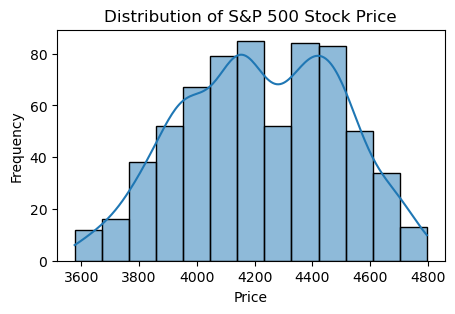

In [7]:
# use a histogram to visualize the distribution
plt.figure(figsize=(5, 3))
sns.histplot(df['Close'], kde=True)
plt.title('Distribution of S&P 500 Stock Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [8]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,665.000000,665.000000,665.000000,665.000000,665.000000,6.650000e+02
mean,4222.954327,4249.187551,4195.163981,4223.438754,4223.438754,4.292454e+09
std,269.243230,264.898261,272.467944,268.644353,268.644353,8.467427e+08
min,3520.370117,3608.340088,3491.580078,3577.030029,3577.030029,1.706460e+09
25%,4001.830078,4038.879883,3971.189941,4002.870117,4002.870117,3.810140e+09
50%,4210.770020,4237.089844,4188.629883,4208.120117,4208.120117,4.125050e+09
75%,4440.939941,4458.479980,4414.020020,4439.259766,4439.259766,4.562940e+09
max,4804.509766,4818.620117,4780.040039,4796.560059,4796.560059,9.354280e+09


## Stock Related News Data Pre-Processing

In [9]:
import requests
import json
import numpy as np
import pandas as pd
import nltk 
import matplotlib
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from string import punctuation
import re
import numpy as np
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer

In [10]:
data = pd.read_csv('News.csv')
data.head()

,Date,Text
0,Dec 112023,SPX: S&P 500 Rocks the Santa Rally Energy with...
1,Dec 082023,SPX: S&P 500 Tiptoes Near Year High with Fresh...
2,Nov 272023,SPX: S&P 500 Futures Drift Lower by 0.2% After...
3,Nov 212023,SPX: S&P 500 Rises 0.8% to Exit Correction Zon...
4,Nov 152023,SPX: S&P 500 Rallies 2% for Best Day Since Apr...


In [11]:
data

,Date,Text
0,Dec 112023,SPX: S&P 500 Rocks the Santa Rally Energy with...
1,Dec 082023,SPX: S&P 500 Tiptoes Near Year High with Fresh...
2,Nov 272023,SPX: S&P 500 Futures Drift Lower by 0.2% After...
3,Nov 212023,SPX: S&P 500 Rises 0.8% to Exit Correction Zon...
4,Nov 152023,SPX: S&P 500 Rallies 2% for Best Day Since Apr...
...,...,...
150,Jun 152021,Buybacks are backSome good news from the S&P 5...
151,May 272021,Spin-off success for OrganonAfter a spin-off f...
152,May 102021,Charles River Laboratories joins the partyAn a...
153,Apr 152021,PTC joins the indexDigital transformation comp...


In [12]:
data['Date'] = pd.to_datetime(data['Date'], format='%b %d%Y')
data['Date'] = data['Date'].dt.strftime('%Y-%m-%d')

# remove the news after November 2023
data = data.drop(range(7), axis=0)
data = data.sort_values(by='Date', ascending=True)
data = data.reset_index(drop=True)

In [13]:
data.head()

,Date,Text
0,2021-03-12,S&P 500 adds four new componentsThe S&P 500 sh...
1,2021-04-15,PTC joins the indexDigital transformation comp...
2,2021-05-10,Charles River Laboratories joins the partyAn a...
3,2021-05-27,Spin-off success for OrganonAfter a spin-off f...
4,2021-06-15,Buybacks are backSome good news from the S&P 5...


In [14]:
# Create a Function to remove non-ascii characters from the text
def _removeNonAscii(s): 
    return "".join(i for i in s if ord(i) < 128)

In [15]:
# Create a Function to clean text
def clean_text(text):
    text = text.lower()
    text = re.sub(r"what's", "what is ", text)
    text = text.replace('(ap)', '')
    text = re.sub(r"\'s", " is ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "cannot ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r'\W+', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r"\\", "", text)
    text = re.sub(r"\'", "", text)    
    text = re.sub(r"\"", "", text)
    text = re.sub('[^a-zA-Z ?!]+', '', text)
    text = _removeNonAscii(text)
    # Replace 'p' with 'sp500'
    text = re.sub(r'\bp\b', 'sp500', text)
    text = text.strip()
    return text


In [16]:
# Create a Function to remove stopwords
def remove_stopwords(word_tokens):
    filtered_sentence = [] 
    stop_words = set(stopwords.words('english'))
    filtered_sentence = [w for w in word_tokens if not w in stop_words]
    return filtered_sentence


In [17]:
# Create a Function for lemmatization
def lemmatize(x):
    lemmatizer = WordNetLemmatizer()
    return ' '.join([lemmatizer.lemmatize(word) for word in x])

In [18]:
# Create a Sample text data
text_data = "This is an example text and it includes stopwords and non-ascii characters like ö."
# Apply preprocessing steps
text_data = clean_text(text_data)
word_tokens = RegexpTokenizer(r'\w+').tokenize(text_data)
filtered_tokens = remove_stopwords(word_tokens)
lemmatized_text = lemmatize(filtered_tokens)

print("Original Text:", text_data)
print("Cleaned and Lemmatized Text:", lemmatized_text)

Original Text: this is an example text and it includes stopwords and non ascii characters like
Cleaned and Lemmatized Text: example text includes stopwords non ascii character like


In [19]:
# Splitting text into a list of tokens
tokenizer = RegexpTokenizer(r'\w+')
def tokenize(x): 
    return tokenizer.tokenize(x)

In [20]:
# Applying all of these functions to the dataframe 
data['Text'] = data['Text'].map(clean_text)
data['tokens'] = data['Text'].map(tokenize)
data['tokens'] = data['tokens'].map(remove_stopwords)
data['lems'] =data['tokens'].map(lemmatize)

In [21]:
data.head()

,Date,Text,tokens,lems
0,2021-03-12,s sp500 adds four new componentsthe s sp500 ...,"[sp500, adds, four, new, componentsthe, sp500,...",sp500 add four new componentsthe sp500 shake t...
1,2021-04-15,ptc joins the indexdigital transformation comp...,"[ptc, joins, indexdigital, transformation, com...",ptc join indexdigital transformation company p...
2,2021-05-10,charles river laboratories joins the partyan a...,"[charles, river, laboratories, joins, partyan,...",charles river laboratory join partyan acquisit...
3,2021-05-27,spin off success for organonafter a spin off f...,"[spin, success, organonafter, spin, merck, co,...",spin success organonafter spin merck co organo...
4,2021-06-15,buybacks are backsome good news from the s sp5...,"[buybacks, backsome, good, news, sp500, buybac...",buyback backsome good news sp500 buyback doubl...


## Sentiment Analysis

In [22]:
# Calculate the polarity of the news articles 
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
sia = SIA()
results = []
for line in data['lems'] :
    pol_score = sia.polarity_scores(line)
    pol_score['Text'] = line
    results.append(pol_score)

In [23]:
# Creating a new dataframe of only the polarity score
data2 = pd.DataFrame.from_records(results)
temp = []
for line in data['Date'] :
    temp.append(line)
data2['Date'] =temp

In [24]:
# categorize news as positive, neutral, or negative based on the compound score obtained
data2['label'] = 'neutral'  # Default to neutral

# consider the news as positive if the compound score is greater than or equal to 0.05, hence the label 'positive'
data2.loc[data2['compound'] >= 0.05, 'label'] = 'positive'

# consider the news as negative if the compound score is less than or equal to -0.05, hence the label 'negative'
data2.loc[data2['compound'] <= -0.05, 'label'] = 'negative'

# calculate word count
data2['word_count'] = data2['Text'].apply(lambda x: len(str(x).split()))


In [25]:
data2.head()

,neg,neu,pos,compound,Text,Date,label,word_count
0,0.046,0.801,0.153,0.9825,sp500 add four new componentsthe sp500 shake t...,2021-03-12,positive,256
1,0.000,0.962,0.038,0.2960,ptc join indexdigital transformation company p...,2021-04-15,positive,56
2,0.000,0.827,0.173,0.8126,charles river laboratory join partyan acquisit...,2021-05-10,positive,49
3,0.033,0.820,0.147,0.7845,spin success organonafter spin merck co organo...,2021-05-27,positive,62
4,0.106,0.771,0.123,0.1779,buyback backsome good news sp500 buyback doubl...,2021-06-15,positive,38


In [27]:
# change the label from categorical to numerical variable to avoid error when plotting
# categorize news as positive, neutral, or negative based on the compound score obtained
data2['label'] = 0

# consider the news as positive if the compound score is greater than or equal to 0.05, hence the label 1
data2.loc[data2['compound'] >= 0.05, 'label'] = 1

# consider the news as neutral if the compound score is between -0.05 and 0.05, hence the label 0
data2.loc[(data2['compound'] > -0.05) & (data2['compound'] < 0.05), 'label'] = 0

# consider the news as negative if the compound score is less than or equal to -0.05, hence the label -1
data2.loc[data2['compound'] <= -0.05, 'label'] = -1

In [28]:
data2.head()

,neg,neu,pos,compound,Text,Date,label,word_count
0,0.046,0.801,0.153,0.9825,sp500 add four new componentsthe sp500 shake t...,2021-03-12,1,256
1,0.000,0.962,0.038,0.2960,ptc join indexdigital transformation company p...,2021-04-15,1,56
2,0.000,0.827,0.173,0.8126,charles river laboratory join partyan acquisit...,2021-05-10,1,49
3,0.033,0.820,0.147,0.7845,spin success organonafter spin merck co organo...,2021-05-27,1,62
4,0.106,0.771,0.123,0.1779,buyback backsome good news sp500 buyback doubl...,2021-06-15,1,38


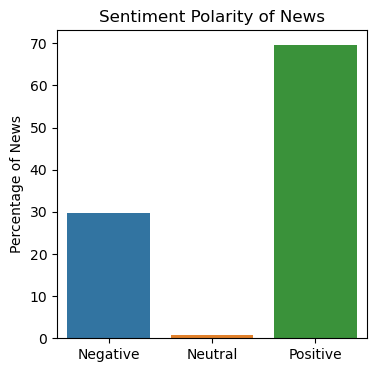

In [47]:
# create a bar chart
fig, ax = plt.subplots(figsize=(4, 4))
counts = data2.label.value_counts(normalize=True) * 100
sns.barplot(x=counts.index,y=counts, ax=ax)
ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])
ax.set_ylabel("Percentage of News")
ax.set_title("Sentiment Polarity of News")
plt.show()

#It is clear from the bar chart that the distribution of news is mainly positive 

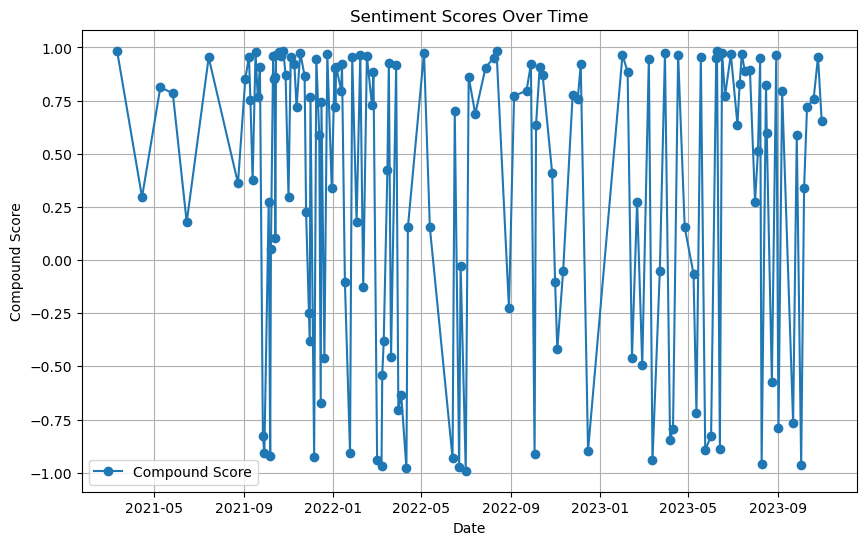

In [45]:
data2['Date'] = pd.to_datetime(data2['Date'])

# Sorting the DataFrame by date
data2 = data2.sort_values('Date')

# Plotting sentiment scores over time
plt.figure(figsize=(10, 6))
plt.plot(data2['Date'], data2['compound'], label='Compound Score', marker='o')

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Compound Score')
plt.title('Sentiment Scores Over Time')
plt.legend()
plt.grid(True)
plt.show()


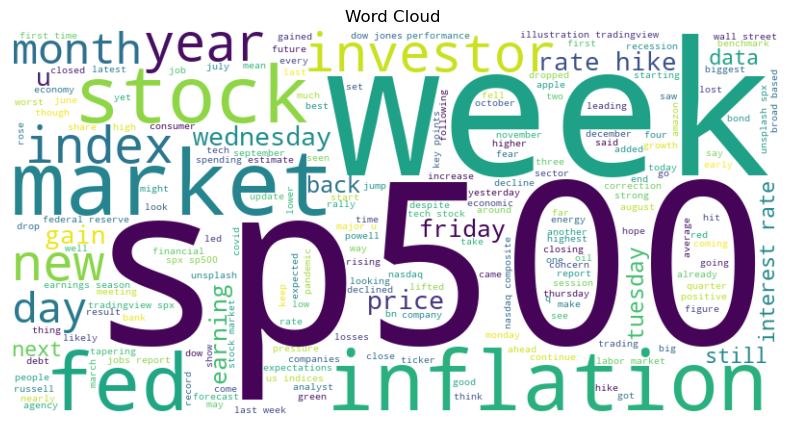

In [31]:
# Wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Concatenate all cleaned and lemmatized text into a single string
all_text = ' '.join(data['tokens'].apply(lambda x: ' '.join(x)))

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Display the generated word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud ')
plt.show()

## Time Series Analysis with Sentiment Features
Align the sentiment scores with the corresponding dates of the stock prices to establish temporal relationships.

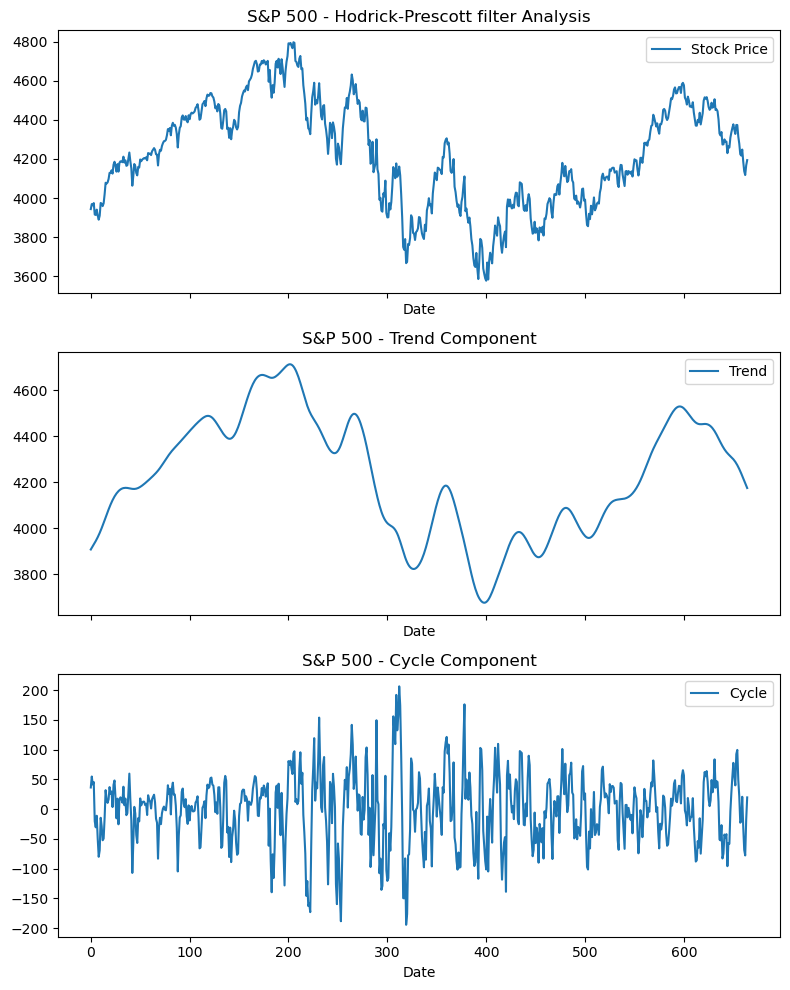

In [32]:
from statsmodels.tsa.filters.hp_filter import hpfilter


# Apply Hodrick-Prescott filter to decompose the data into trend and cyclical components
cycle, trend = hpfilter(df['Close'], lamb=1600)

# Create a figure with 3 subplots
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8, 10), sharex=True)

# Plot the original data
axes[0].plot(df.index, df['Close'], label='Stock Price')
axes[0].set_title('S&P 500 - Hodrick-Prescott filter Analysis')
axes[0].legend()

# Plot the trend component
axes[1].plot(df.index, trend, label='Trend')
axes[1].set_title('S&P 500 - Trend Component')
axes[1].legend()

# Plot the cycle component
axes[2].plot(df.index, cycle, label='Cycle')
axes[2].set_title('S&P 500 - Cycle Component')
axes[2].legend()

# Set the labels
for ax in axes:
    ax.set_xlabel('Date')

plt.tight_layout()
plt.show()

In [33]:
# Make sure 'Date' is in datetime format
data2['Date'] = pd.to_datetime(data2['Date'])

# Create a DataFrame with all dates from the start to the end of your desired date range
date_range = pd.date_range(start=min(data2['Date']), end=max(data2['Date']), freq='D')
all_dates_df = pd.DataFrame({'Date': date_range})

# Merge the sentiment DataFrame with the complete date range DataFrame to fill missing dates
merged_df = pd.merge(all_dates_df, data2, on='Date', how='left')

# Forward fill the missing values based on the previous date's sentiment score
merged_df['compound'] = merged_df['compound'].fillna(method='ffill')
merged_df['label'] = merged_df['label'].fillna(method='ffill').astype(int)

# If there are still missing values at the beginning, backward fill them
merged_df['compound'] = merged_df['compound'].fillna(method='bfill')
merged_df['label'] = merged_df['label'].fillna(method='bfill').astype(int)


In [34]:
# Check the resulting DataFrame
merged_df.head()

,Date,neg,neu,pos,compound,Text,label,word_count
0,2021-03-12,0.046,0.801,0.153,0.9825,sp500 add four new componentsthe sp500 shake t...,1,256.0
1,2021-03-13,NaN,NaN,NaN,0.9825,NaN,1,NaN
2,2021-03-14,NaN,NaN,NaN,0.9825,NaN,1,NaN
3,2021-03-15,NaN,NaN,NaN,0.9825,NaN,1,NaN
4,2021-03-16,NaN,NaN,NaN,0.9825,NaN,1,NaN


In [35]:
# Merge both datasets on the 'Date' column
merged_data = pd.merge(df, merged_df, on='Date', how='inner')
merged_data

,Date,Open,High,Low,Close,Adj Close,Volume,neg,neu,pos,compound,Text,label,word_count
0,2021-03-12,3924.520020,3944.989990,3915.209961,3943.340088,3943.340088,4476280000,0.046,0.801,0.153,0.9825,sp500 add four new componentsthe sp500 shake t...,1,256.0
1,2021-03-15,3942.959961,3970.080078,3923.540039,3968.939941,3968.939941,4900100000,NaN,NaN,NaN,0.9825,NaN,1,NaN
2,2021-03-16,3973.590088,3981.040039,3953.439941,3962.709961,3962.709961,4613080000,NaN,NaN,NaN,0.9825,NaN,1,NaN
3,2021-03-17,3949.570068,3983.870117,3935.739990,3974.120117,3974.120117,4561660000,NaN,NaN,NaN,0.9825,NaN,1,NaN
4,2021-03-18,3953.500000,3969.620117,3910.860107,3915.459961,3915.459961,5118590000,NaN,NaN,NaN,0.9825,NaN,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
659,2023-10-24,4235.790039,4259.379883,4219.430176,4247.680176,4247.680176,3821820000,NaN,NaN,NaN,0.7574,NaN,1,NaN
660,2023-10-25,4232.419922,4232.419922,4181.419922,4186.770020,4186.770020,3869370000,0.035,0.792,0.173,0.9559,spx sp500 snap day losing streak big tech earn...,1,123.0
661,2023-10-26,4175.990234,4183.600098,4127.899902,4137.229980,4137.229980,4277640000,NaN,NaN,NaN,0.9559,NaN,1,NaN
662,2023-10-27,4152.930176,4156.700195,4103.779785,4117.370117,4117.370117,4019500000,NaN,NaN,NaN,0.9559,NaN,1,NaN


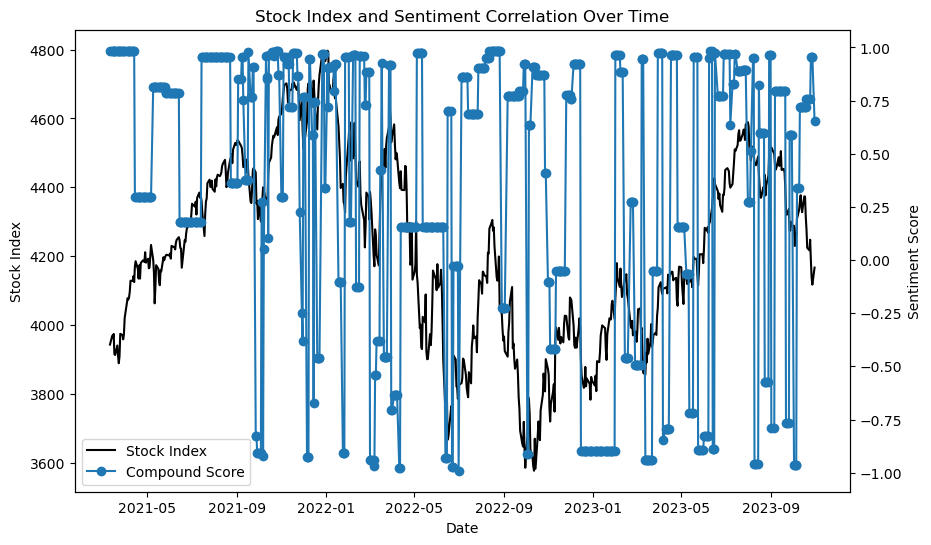

In [36]:
# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot stock index data on the left y-axis
ax1 = plt.gca()
ax1.set_xlabel('Date')
ax1.set_ylabel('Stock Index', color='black')
line1, = ax1.plot(merged_data['Date'], merged_data['Close'], color='black', label='Stock Index')
ax1.tick_params(axis='y', labelcolor='black')

# Create a second y-axis for sentiment analysis compound scores
ax2 = ax1.twinx()
ax2.set_ylabel('Sentiment Score', color='black')
line2, = ax2.plot(merged_data['Date'], merged_data['compound'], label='Compound Score', marker='o')
ax2.tick_params(axis='y', labelcolor='black')

# Show the plot
plt.title('Stock Index and Sentiment Correlation Over Time')
# Combine legends for both axes
lines = [line1, line2]
ax1.legend(lines, [line.get_label() for line in lines], loc='lower left')
plt.show()

In [37]:
# change label from -1,1 to pos,neg
merged_df['label'] = np.where(merged_df['compound'] > 0.05, 'positive', 
                      np.where(merged_df['compound'] < -0.05, 'negative', 'neutral'))

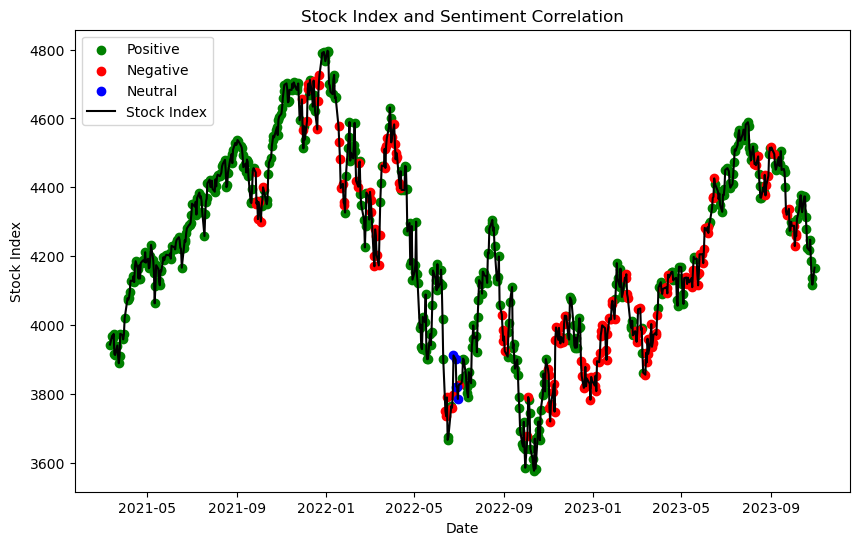

In [38]:
df['Date'] = pd.to_datetime(df['Date'])
merged_df['Date'] = pd.to_datetime(merged_df['Date'])

# Merge the two DataFrames on the 'Date' column
merged_data3 = pd.merge(df, merged_df, on='Date', how='inner')

plt.figure(figsize=(10, 6))

# Scatter plot for positive sentiment
plt.scatter(merged_data3[merged_data3['label'] == 'positive']['Date'], merged_data3[merged_data3['label'] == 'positive']['Close'], color='green', label='Positive')

# Scatter plot for negative sentiment
plt.scatter(merged_data3[merged_data3['label'] == 'negative']['Date'], merged_data3[merged_data3['label'] == 'negative']['Close'], color='red', label='Negative')

# Scatter plot for neutral sentiment
plt.scatter(merged_data3[merged_data3['label'] == 'neutral']['Date'], merged_data3[merged_data3['label'] == 'neutral']['Close'], color='blue', label='Neutral')

# Stock index line plot
plt.plot(merged_data3['Date'], merged_data3['Close'], color='black', label='Stock Index')

plt.xlabel('Date')
plt.ylabel('Stock Index')
plt.title('Stock Index and Sentiment Correlation')
plt.legend()
plt.show()

In [39]:
label_counts = merged_data3['label'].value_counts()
label_counts

positive    478
negative    181
neutral       5
Name: label, dtype: int64

## Correlation Analysis

In [40]:
from scipy.stats import pearsonr, spearmanr

# correlation between "close" and compound score
# Calculate Pearson correlation coefficient
pearson_corr, pearson_p_value = pearsonr(merged_data['compound'], merged_data['Close'])

# Calculate Spearman rank correlation coefficient
spearman_corr, spearman_p_value = spearmanr(merged_data['compound'], merged_data['Close'])

# Print correlation coefficients and p-values
print(f"Pearson Correlation Coefficient: {pearson_corr}")
print(f"Pearson P-value: {pearson_p_value}")
print(f"Spearman Correlation Coefficient: {spearman_corr}")
print(f"Spearman P-value: {spearman_p_value}")

Pearson Correlation Coefficient: 0.15902219776652532
Pearson P-value: 3.85144583893382e-05
Spearman Correlation Coefficient: 0.16977587481271061
Spearman P-value: 1.0897861566923308e-05


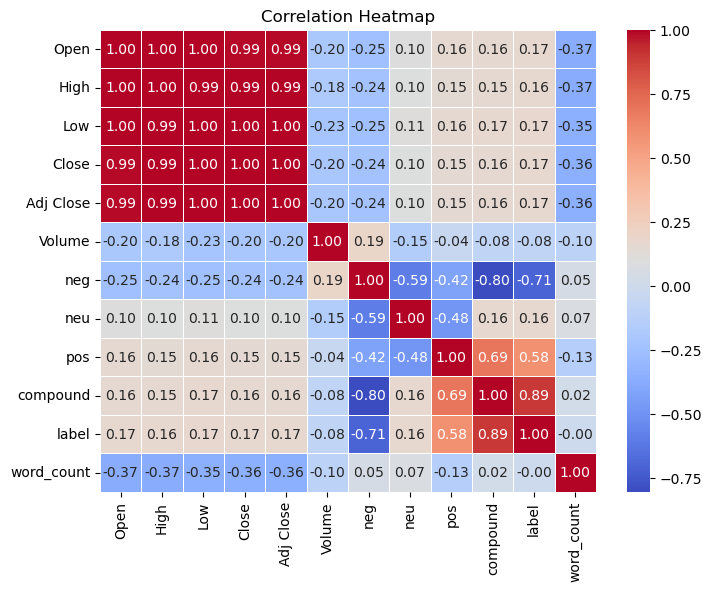

In [41]:
correlation_matrix = merged_data.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()